In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [3]:
# import model vit_minst
model = tf.keras.models.load_model('./cnn_cifar10')
model.summary()

AttributeError: '_UserObject' object has no attribute 'summary'

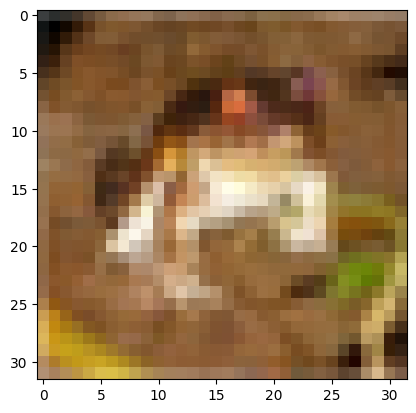

In [6]:
train, test = keras.datasets.cifar10.load_data()

x_train, y_train = train

y_train = y_train.astype("float32")

x_train = x_train / 255.0

x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)

x_test, y_test = test

x_test = x_test / 255.0

x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)

y_test = y_test.astype("float32")


import matplotlib.pyplot as plt

sample = x_train[0].reshape(32, 32, 3)

plt.imshow(sample)

In [10]:
model.evaluate(x_test, y_test)

AttributeError: '_UserObject' object has no attribute 'evaluate'